# Brain Tumor Classifier

## Intro to the problem

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous system (CNS) tumors.

The 5-year survival rate for people with cancerous brain or CNS tumor is approximately 34% for men and 36% for women.

Brain tumors are classified as: Benign tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectanct of patients.

The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by radiologists. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

## Context

**Brain tumor**: a growth of abnormal cells that are either within or around the structure of the brain.

Brain tumors are complex. There're a lot of abnormalities in the sizes and location of brain tumor(s), which makes it difficult for complete understading of the nature of the tumor. Besides, a professional neurosurgeon is required  for MRI analysis. Therefore, an automated system on Cloud can help add a handy second-hand opinion, especially in developing countries where the lack of skillful doctors and specialized knowledge.

**Datasets**:
2 datasets from Kaggle, [one](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) contains more than 3,000 images of MRI, [the other](https://www.kaggle.com/datasets/alaminbhuyan/mri-image-data) has more than 7,000 images


The purpose of this project is to create a machine learning model that is capable of classifying correct brain tumors' types (meningioma, glioma, pituitary, or no tumor) with an aim of over 93%.

##II. Preprocessing

###1. Finding duplicate images
- Since we have imported 2 datasets from Kaggle, there'll certainly be duplicates among the images. Our goal is to sort all of the duplicates, put them into a separate folder and only use the rest of the images
- We'll install difPy package -  which searches for for images in one or more different folders, compares the images it found and checks whether these are duplicates or not, more info: (https://pypi.org/project/difPy/)

In [ ]:
pip install difPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
from difPy import dif

We'll search for duplicate images between 2 folders, "Testing" and "Testing_2" from different sources to make sure later on when training the model, we don't overfit, then move the duplicate images to a new folder called "Testing_duplicate"

In [ ]:
search = dif(['/content/drive/MyDrive/brain_tumor/Testing', '/content/drive/MyDrive/brain_tumor/Testing_2'], move_to='/content/drive/MyDrive/brain_tumor/Testing_duplicate')

difPy preparing files: [1705/1705] [100%]
difPy comparing images: [1705/1705] [100%]
Moved 307 image(s) to /content/drive/MyDrive/brain_tumor/Testing_duplicate
Found 307 pair(s) of duplicate image(s) in 355.2462 seconds.


In [ ]:
# Try the code once again with "Testing" & "Testing_2" to make sure it worked
search_checked = dif(['/content/drive/MyDrive/brain_tumor/Testing', '/content/drive/MyDrive/brain_tumor/Testing_2'])

difPy preparing files: [1398/1398] [100%]
difPy comparing images: [1398/1398] [100%]
Found 0 pair(s) of duplicate image(s) in 1005.7456 seconds.


After checking we, didn't find any duplicate images in both "Testing" and "Testing_2" folder, which proved our code worked. We'll next find duplicate images between "Training" and "Training_2" folder

In [ ]:
search_train = dif(['/content/drive/MyDrive/brain_tumor/Training', '/content/drive/MyDrive/brain_tumor/Training_2'],
                   move_to='/content/drive/MyDrive/brain_tumor/Training_duplicate')

difPy preparing files: [8582/8582] [100%]
difPy comparing images: [8582/8582] [100%]
Moved 2291 image(s) to /content/drive/MyDrive/brain_tumor/Training_duplicate
Found 2291 pair(s) of duplicate image(s) in 9999.4883 seconds.


## Put all of the Training_2 images into Training folder (Done!)

In [ ]:
import os
import glob
import shutil

# Move all of the images from each category - meningioma_2 - in Training_2 folder to Training file
source = '/content/drive/MyDrive/brain_tumor/training_2/meningioma_tumor'
destination = '/content/drive/MyDrive/brain_tumor/Training/meningioma'
#
# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
# Move all of the images from no_tumor in Training_2 folder to Training file
source = '/content/drive/MyDrive/brain_tumor/training_2/no_tumor'
destination = '/content/drive/MyDrive/brain_tumor/Training/notumor'
#
# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
# Move all of the images from pituitary in Training_2 folder to Training file
source = '/content/drive/MyDrive/brain_tumor/training_2/pituitary_tumor'
destination = '/content/drive/MyDrive/brain_tumor/Training/pituitary'
#
# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
#After moving, check for duplicates once again to make sure
search = dif("/content/drive/MyDrive/brain_tumor/Training")

difPy preparing files: [6291/6291] [100%]
difPy comparing images: [6291/6291] [100%]
Found 0 pair(s) of duplicate image(s) in 8256.5947 seconds.


#1. Prepping the data

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Mounted Google Drive to Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all MRI images into drive
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain_tumor'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (270).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (282).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (293).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (262).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (273).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (288).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (264).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (259).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (275).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (260).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (279).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (29).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (30).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (252).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (

In [ ]:
# Import Keras libraries and packages accordingly to train neural network
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
# Import some more packages for viewing images, convert them into Tensor and splitting images into training/testing
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150 # We'll set every image size into 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Training', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.resize(img, (image_size, image_size))
    X_train.append(img)
    Y_train.append(i)

for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Testing', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.resize(img, (image_size, image_size))
    X_train.append(img)
    Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

Other way to approach this problem is to include the training and testing files into X_train and Y_train to increase the number of images the machine can learn. However, this approach might lead to data leakage and our machine will overfit.

In [ ]:
# To prevent bias before the training, we shuffle the dataset to randomize the order of the dataset presented
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_train.shape

(6605, 150, 150, 3)

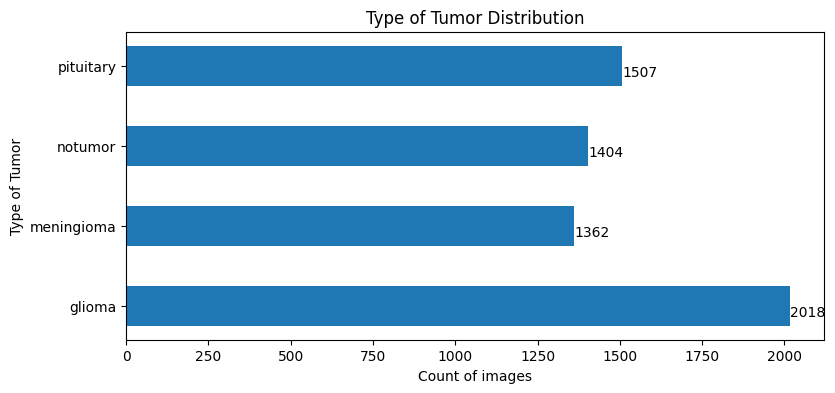

In [ ]:
# Visualize distribution of the training dataset
category_count = {}

valid_extensions = ('.jpg', '.png', '.jpeg')

for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Training', i)
  valid_images = [file for file in os.listdir(folder_path) if file.lower().endswith(valid_extensions)]
  category_count[i] = len(valid_images)

fig, ax = plt.subplots(figsize = (9,4))

# Bar chart
bar_plot = plt.barh(list(category_count.keys()), list(category_count.values()), 0.5)
plt.title("Type of Tumor Distribution")
plt.xlabel('Count of images')
plt.ylabel('Type of Tumor')
for i, bar in enumerate(bar_plot):
  plt.text(bar.get_width(),
           bar.get_y() + bar.get_height() / 2, str(list(category_count.values())[i]),
           va = 'top')

plt.show()

Overall, although MRI of gioma tumor is slightly more than the rest but the difference is not vast/major

After shuffling, we'll split the data into Training and testing datasets. Before training the data, we need to first convert the labels into numerical values since the computer won't understand the strings labels we declared before that.



In [ ]:
# Splitting the data into training and testing sets
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train,
                                                    test_size = 0.1,
                                                    random_state=42)
# Append labels to y_train
y_train_new = []
for i in Y_train:
  y_train_new.append(labels.index(i))

y_train = y_train_new
# Convert it into categorical: 0 - glioma tumor, 1 - meningioma tumor, 2 - no tumor, 3 - pituitary tumor
Y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
# Doing the same thing with y_test
y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))

y_test = y_test_new
# Convert it into categorical:
Y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Check the shape of y_train
Y_train.shape

(5944, 4)

In [ ]:
# Check the shape of x_test and Y_test once again
print(x_test.shape)
print(Y_test.shape)

(661, 150, 150, 3)
(661, 4)


### Visualize the MRI before training!

Since the MRI data is a 2D Numpy array of integers, we can plot and visualize it using Matplotlib's `plt.imshow()`

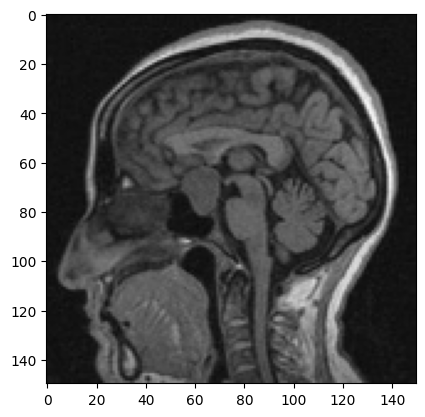

In [ ]:
plt.imshow(X_train[1])

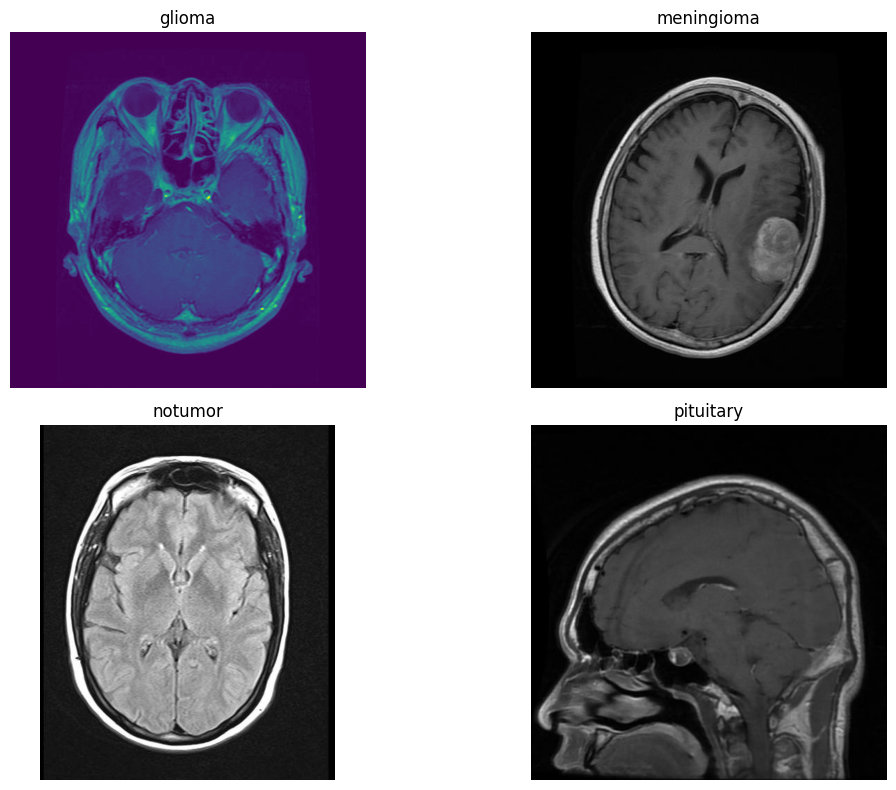

In [ ]:
plt.figure(figsize = (12, 8))

for i, label in enumerate(labels):
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Training', label)
  image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
  if not image_path.lower().endswith(valid_extensions):
    continue
  img = plt.imread(image_path)
  plt.subplot(2, 2, i+1)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

plt.tight_layout()
plt.show()

#2. Training with CNN (without augmentation)

##2.2. Basic model with 1 layer of CNN

In [ ]:
tf.random.set_seed(42)

# Define the mode
model1 = Sequential()

# Add single layer (Dense) to the model
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu',
                  input_shape = (150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before passing it to Dense layer
model1.add(Flatten())
# Add a Dense layer
model1.add(Dense(units=4, activation = 'softmax'))
# Compile the model
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print a summary of the model architectures
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 700932    
                                                                 
Total params: 701828 (2.68 MB)
Trainable params: 701828 (2.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model to our data
history = model1.fit(X_train, Y_train, epochs = 30, validation_split= 0.1)

Epoch 1/30
168/168 [==============================] - 3s 12ms/step - loss: 80.0752 - accuracy: 0.6753 - val_loss: 1.7652 - val_accuracy: 0.7983
Epoch 2/30
168/168 [==============================] - 2s 12ms/step - loss: 0.5440 - accuracy: 0.9162 - val_loss: 0.9560 - val_accuracy: 0.8706
Epoch 3/30
168/168 [==============================] - 2s 11ms/step - loss: 0.1837 - accuracy: 0.9667 - val_loss: 1.0140 - val_accuracy: 0.8807
Epoch 4/30
168/168 [==============================] - 2s 10ms/step - loss: 0.0649 - accuracy: 0.9871 - val_loss: 1.0789 - val_accuracy: 0.8723
Epoch 5/30
168/168 [==============================] - 2s 10ms/step - loss: 0.1269 - accuracy: 0.9828 - val_loss: 0.9828 - val_accuracy: 0.8891
Epoch 6/30
168/168 [==============================] - 2s 10ms/step - loss: 0.0401 - accuracy: 0.9942 - val_loss: 1.0303 - val_accuracy: 0.8975
Epoch 7/30
168/168 [==============================] - 2s 10ms/step - loss: 0.0682 - accuracy: 0.9912 - val_loss: 1.1808 - val_accuracy: 0.884

In [ ]:
# Save the model!
model1.save('braintumor1')

In [ ]:
test_loss, test_accuracy = model1.evaluate(x_test, Y_test)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

21/21 [==============================] - 0s 9ms/step - loss: 3.4752 - accuracy: 0.8820
Test Accuracy: 0.8820
Test loss: 3.4752


Here are a few observation from the finding above:
- Test accuracy is 88%, but test loss is closer to 3.47, which is a relatively high value (lower values are usually better) - this also means there's room for improvement.

- In deep learning, the loss function is used by model to learn, loss value in training dataset actually decreasing overtime, while loss value in validation set increasing overtime (although in a small value), our model is overfitting - it might be overlearning from the examples.  

In [ ]:
pred = model1.predict(x_test)
pred = np.argmax(pred, axis =1)
y_test_new = np.argmax(Y_test, axis = 1)

21/21 [==============================] - 0s 7ms/step


We choose `argmax()` function to find out the index associated with the predicted outcome.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       209
           1       0.78      0.78      0.78       138
           2       0.92      0.95      0.93       150
           3       0.92      0.93      0.93       164

    accuracy                           0.88       661
   macro avg       0.88      0.88      0.88       661
weighted avg       0.88      0.88      0.88       661



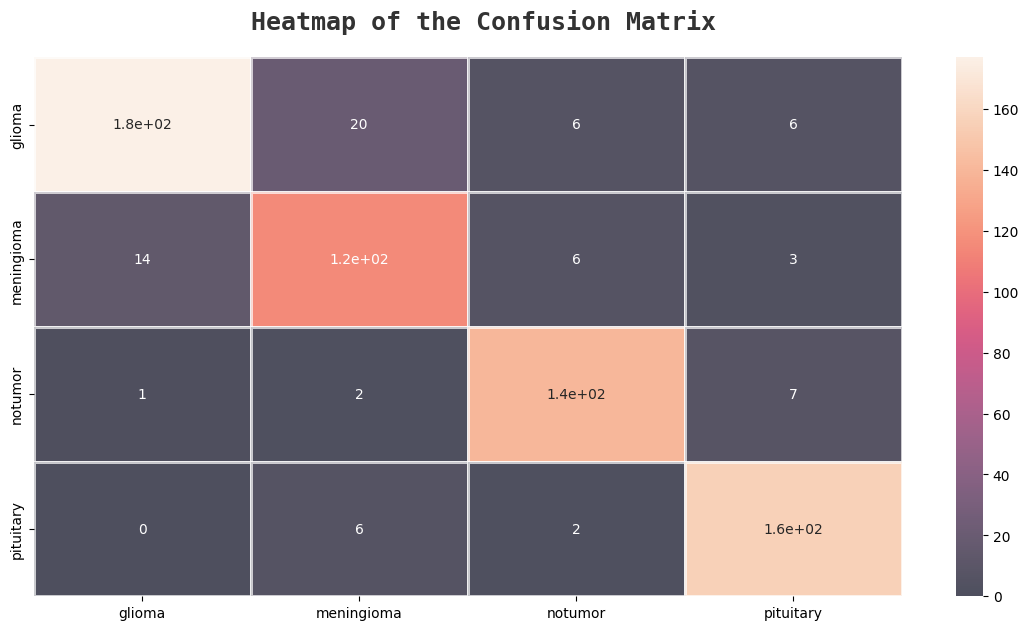

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 7))
sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax,
            xticklabels = labels, yticklabels = labels, annot = True,
            alpha = 0.7, linewidths = 2)

fig.text(s = 'Heatmap of the Confusion Matrix', size = 18, fontweight = 'bold',
         fontname = 'monospace',
         y = 0.92, x = 0.28,alpha = 0.8)
plt.show()

## Insights:
**Accuracy:** Overall, the accuracy is 89% - 89% of the instances are correctly classified across all classes, which is not bad at all for a baseline model.

**Precision:** For class 0, the precision is the highest, 92% and 80%, 91% and 91% for classes 1, 2, and 3 respectively.

**Overall**, with our first-try, the results is somehow satisfactory, however, we can definitely tune the parameters to come up with more convincing ML model




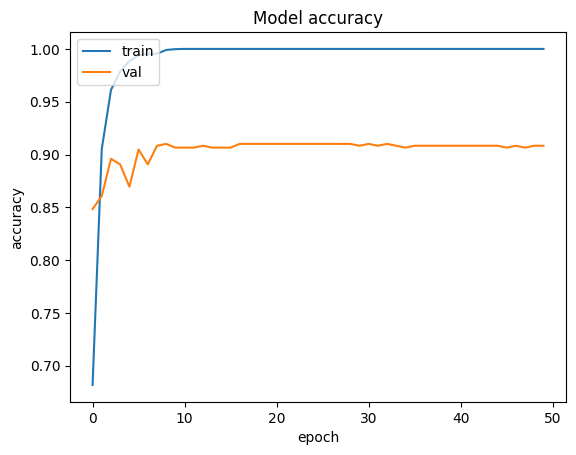

In [ ]:
from sklearn.metrics import confusion_matrix

# Plotting train and val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

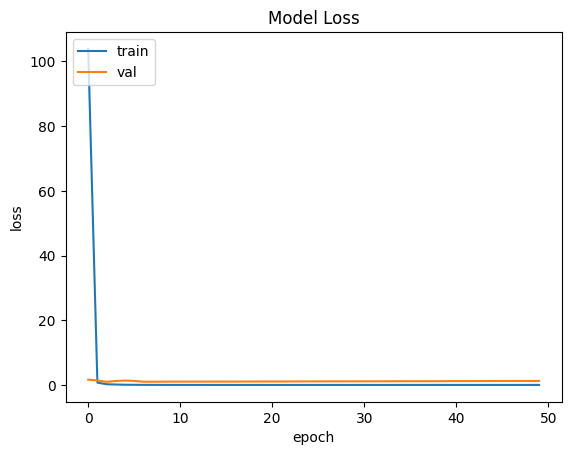

In [ ]:
# Plotting model tran and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

It seems like after the first few epochs, the loss function doesn't improve as much as we thought. As we already saw in the above finding, the model is overfitting and the improvement is too little to notice. Therefore, we'll create the next CNN model with 9-layers.

### 2.2. CNN model with 9 layers
- Our CNN will contain 9 layers, and the activation function will be Softmax(Using Softmax since we're dealing with probabilities - for each type of image, there will be, for example, 60% no tumor, 30% meningioma tumor, and so on).
Otherwise, we'll use sigmoid function
- **Dropout**: This layers omits some neurons at each step, making them more independent and avoid overfitting.
- **Dense**: output layer which uses 'softmax' function to classify images into 1 out of 4 possible classes

In [ ]:
# Create 9 Convo

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [ ]:
# Print out summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer= 'Adam',
              metrics = ['accuracy'])

In [ ]:
# We already saved our model so we don't need to fit the model again!
# model.save('braintumor.h5')
history = model.fit(X_train, Y_train, epochs = 50, validation_split= 0.1)

Epoch 1/50
168/168 [==============================] - 30s 114ms/step - loss: 1.5344 - accuracy: 0.4558 - val_loss: 1.1674 - val_accuracy: 0.5445
Epoch 2/50
168/168 [==============================] - 15s 91ms/step - loss: 0.7921 - accuracy: 0.6725 - val_loss: 0.9705 - val_accuracy: 0.5966
Epoch 3/50
168/168 [==============================] - 15s 91ms/step - loss: 0.6437 - accuracy: 0.7278 - val_loss: 0.6992 - val_accuracy: 0.7176
Epoch 4/50
168/168 [==============================] - 15s 91ms/step - loss: 0.5639 - accuracy: 0.7629 - val_loss: 0.7733 - val_accuracy: 0.6975
Epoch 5/50
168/168 [==============================] - 15s 90ms/step - loss: 0.4995 - accuracy: 0.7923 - val_loss: 0.8416 - val_accuracy: 0.6874
Epoch 6/50
168/168 [==============================] - 16s 95ms/step - loss: 0.4406 - accuracy: 0.8179 - val_loss: 0.7945 - val_accuracy: 0.6824
Epoch 7/50
168/168 [==============================] - 15s 91ms/step - loss: 0.4008 - accuracy: 0.8332 - val_loss: 0.7848 - val_accuracy

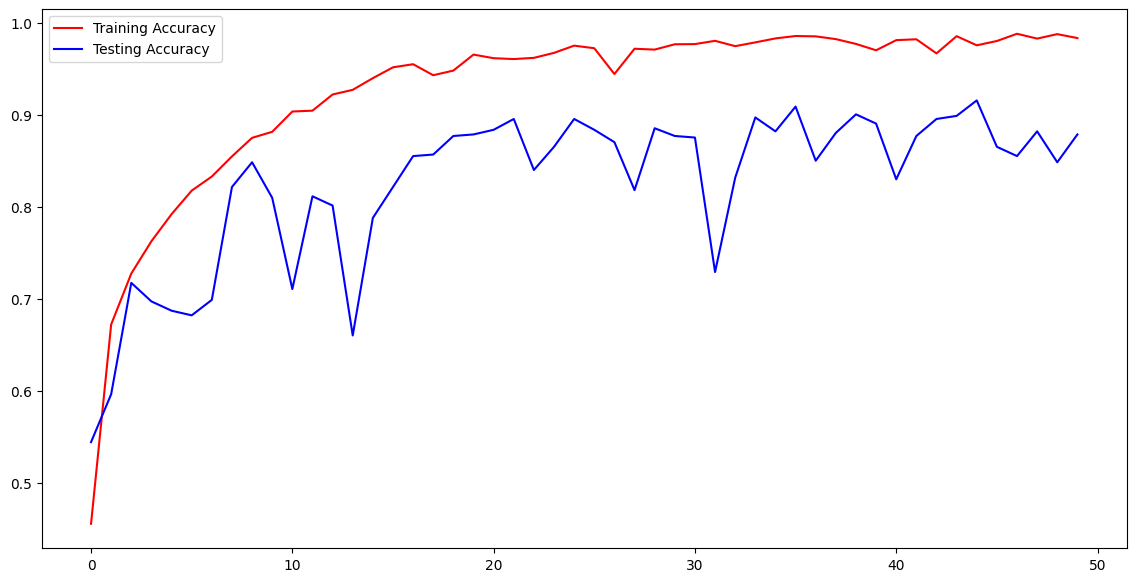

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We already saved our model so we don't need to run it again
brain_tumor = load_model('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14, 7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Testing Accuracy')
plt.legend(loc = 'upper left')
plt.show()

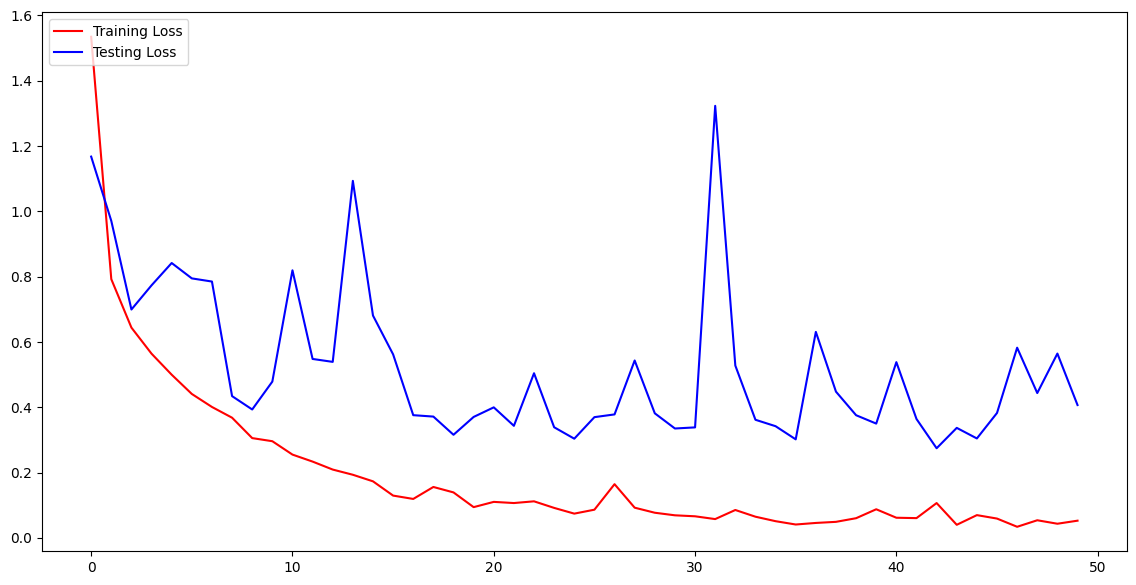

In [ ]:
# Visualize

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize = (14, 7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Testing Loss')
plt.legend(loc = 'upper left')
plt.show()

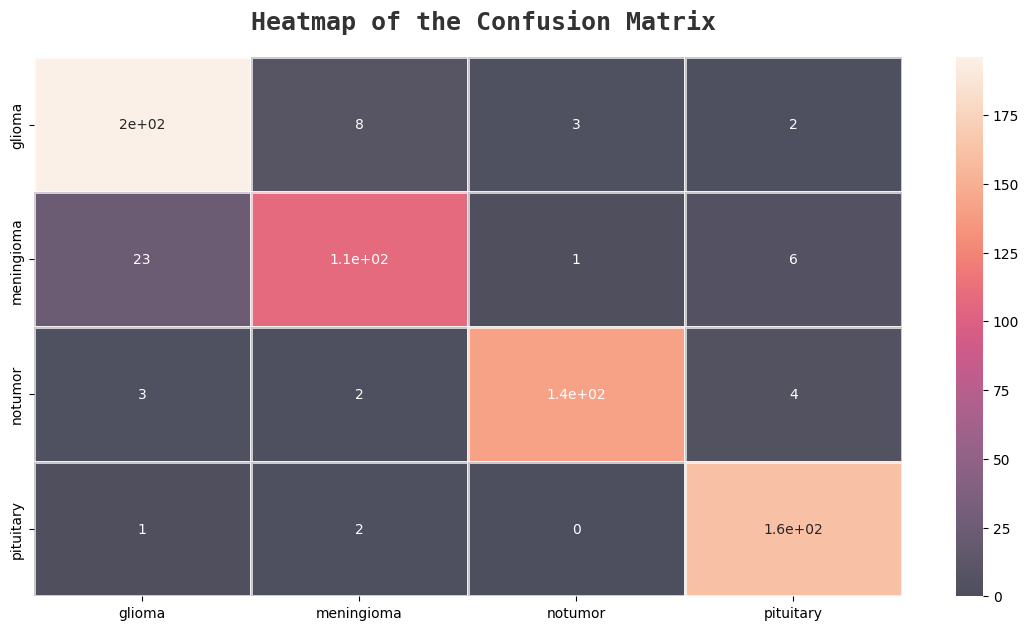

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

fig, ax = plt.subplots(1, 1, figsize = (14, 7))
sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax,
            xticklabels = labels, yticklabels = labels, annot = True,
            alpha = 0.7, linewidths = 2)

fig.text(s = 'Heatmap of the Confusion Matrix', size = 18, fontweight = 'bold',
         fontname = 'monospace',
         y = 0.92, x = 0.28,alpha = 0.8)
plt.show()

In [ ]:
Y_test.shape

(661, 4)

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis =1)
y_test_new = np.argmax(Y_test, axis = 1)

print(classification_report(y_test_new, pred))

21/21 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       209
           1       0.90      0.78      0.84       138
           2       0.97      0.94      0.96       150
           3       0.93      0.98      0.96       164

    accuracy                           0.92       661
   macro avg       0.92      0.91      0.91       661
weighted avg       0.92      0.92      0.92       661



As we can see, the improvement overall has looked way better for each of the classes,

## Prediction

In [ ]:
# Predict an image
img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/notumor/image(100).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

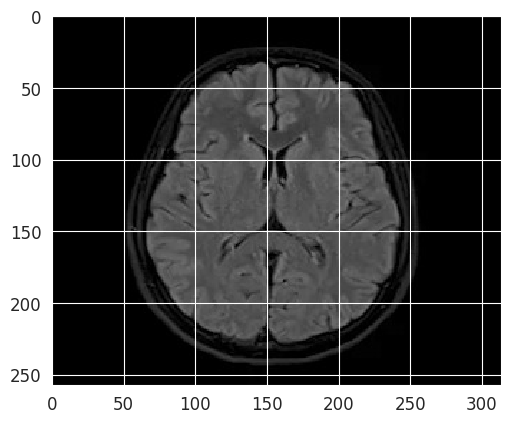

1/1 [==============================] - 1s 1s/step


2

In [ ]:
# Reshape img to fit our model
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

# Visualize the image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor/Testing/notumor/image(100).jpg')
plt.imshow(img, interpolation = 'nearest')
plt.show()

# Predict the label using our model
a = model.predict(img_array)
# Get the largest probability
indices = a.argmax()
indices

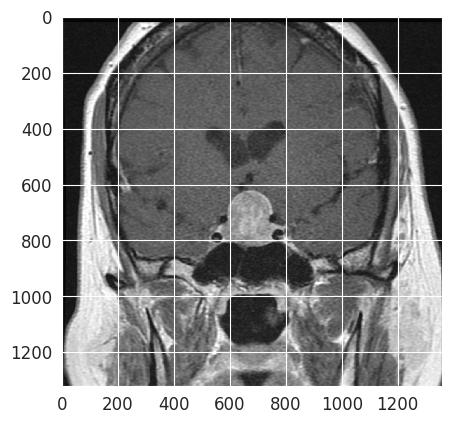

1/1 [==============================] - 0s 33ms/step


3

In [ ]:
# Predict another image
img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary/image(28).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape
# Reshape img to fit our model
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

# Visualize the image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor/Testing/pituitary/image(28).jpg')
plt.imshow(img, interpolation = 'nearest')
plt.show()

# Predict the label using our model
a = model.predict(img_array)
# Get the largest probability
indices = a.argmax()
indices

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6291, 150, 150, 3)
(314, 150, 150, 3)


In [ ]:
# To prevent bias before the training, we shuffle the dataset to randomize the order of the dataset presented
X_train, y_train = shuffle(X_train, y_train, random_state=42)


#3. Resnet34
In out 3rd attempt, we'll use pre-trained neural network - Resnet 34 to train our dataset and compare it with the other 2 models to see how efficient it's

In [ ]:
# In case gdrive is not connected

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00


In [ ]:
# Import libraries from fastbook
from fastbook import *
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [ ]:
import os
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# Import the necessary modules from fastbook
from fastbook import *
# Import modules from Fastai
from fastai.vision import *
import numpy as np

In [ ]:
my_trained_mod = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])
my_trained_mod.fit_one_cycle(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.926612,0.373283,0.113858,0.886142,01:11
1,0.487506,0.256932,0.081327,0.918673,01:00
2,0.280441,0.190143,0.065712,0.934288,00:59
3,0.179392,0.171453,0.057905,0.942095,01:00
4,0.138877,0.173527,0.059206,0.940794,00:59


In [ ]:
# We'll do image augmentation using Fastai library

tfms = aug_transforms(do_flip=False)
path = '/content/gdrive/MyDrive/brain_tumor'
data = ImageDataLoaders.from_folder(path, train = 'Training', valid = 'Validation',
                                    item_tfms = Resize(150), seed = 42,
                                    num_workers = 3, bs = 64, valid_pct=0.2)

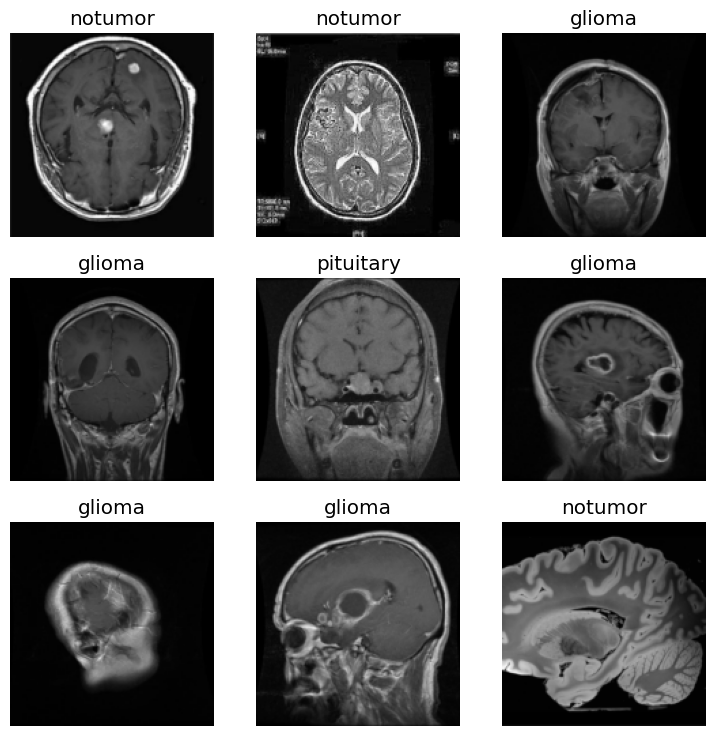

In [ ]:
data.show_batch()

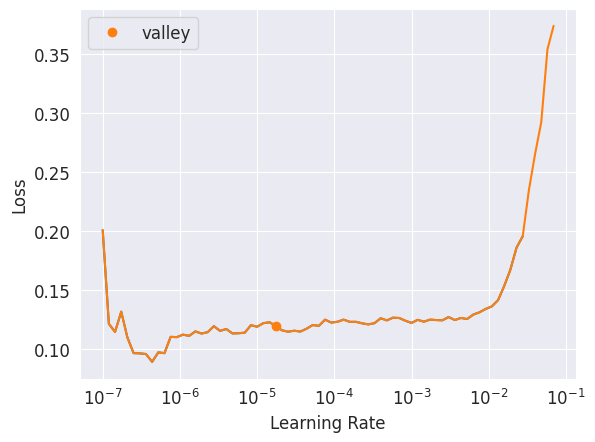

In [ ]:
# Check the learning rate
my_trained_mod.lr_find()
plt.plot(my_trained_mod.recorder.lrs, my_trained_mod.recorder.losses)

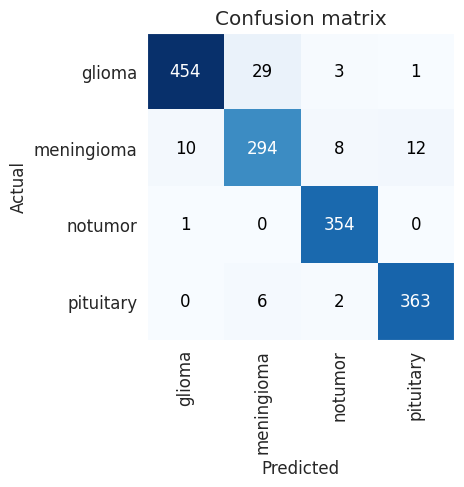

In [ ]:
interp = ClassificationInterpretation.from_learner(my_trained_mod)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

      glioma       0.98      0.93      0.95       487
  meningioma       0.89      0.91      0.90       324
     notumor       0.96      1.00      0.98       355
   pituitary       0.97      0.98      0.97       371

    accuracy                           0.95      1537
   macro avg       0.95      0.95      0.95      1537
weighted avg       0.95      0.95      0.95      1537



In [ ]:
validation_dataset = '/content/gdrive/MyDrive/brain_tumor/Validation'
true_labels = validation_dataset.targets

# Get predicted labels using your model
predicted_labels = []
for xb, yb in validation_dataloader:
    # Assuming you're using a PyTorch model
    preds = my_trained_mod(xb)
    predicted_labels.extend(preds.argmax(dim=1).tolist())

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Define your class labels
class_labels = ["Class1", "Class2", "Class3", "Class4"]

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print and plot classification report
print("Classification Report:")
print(report)

#Next Suggested steps: CNN with data augmentation
### Basic models with more cleaning


> Firstly, finding medical image is already a challenge, accessibility poses even greater concern. Secondly, getting a massive amount of dataset quite challenging due to the fact that this type of data is not always publicly avaiable. Therefore, if we can find a way to expan our dataset from, for example, 1000 images to 2000 images, our machine learning model will at a more advantageous position. Besides, augmenting images will help reduce the overfitting and improve the precision of the proposed models.

During the process of loading datasets, we'll also **remove image noise**  and **normalize images into range 0 to 1**.

In computer vision, the pixel normalization technique is often used to [speed up model learning](https://www.imaios.com/en/resources/blog/ct-images-normalization-zero-centering-and-standardization#:~:text=In%20computer%20vision%2C%20the%20pixel,a%2016%2Dbit%20image)



In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# We'll load the training dataset once again
X_train = []
y_train = []
X_test = []
y_test = []

image_size = 150 # We'll set every image size into 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Training', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.bilateralFilter(img, 2, 50, 50) # Remove image noise
    img = cv2.resize(img, (image_size, image_size)) # Resize img into 150*150
    X_train.append(img)
    y_train.append(i)

  test_path = os.path.join('/content/drive/MyDrive/brain_tumor/Testing', i)
  for j in os.listdir(test_path):
    image = cv2.imread(os.path.join(test_path, j))
    image = cv2.bilateralFilter(image, 2, 50, 50)
    image = cv2.resize(image, (image_size, image_size))
    X_test.append(image)
    y_test.append(i)


X_train = np.array(X_train) / 255.0 # Normalize images into range 0 - 1 (8-bit image)
X_test = np.array(X_test) / 255.0

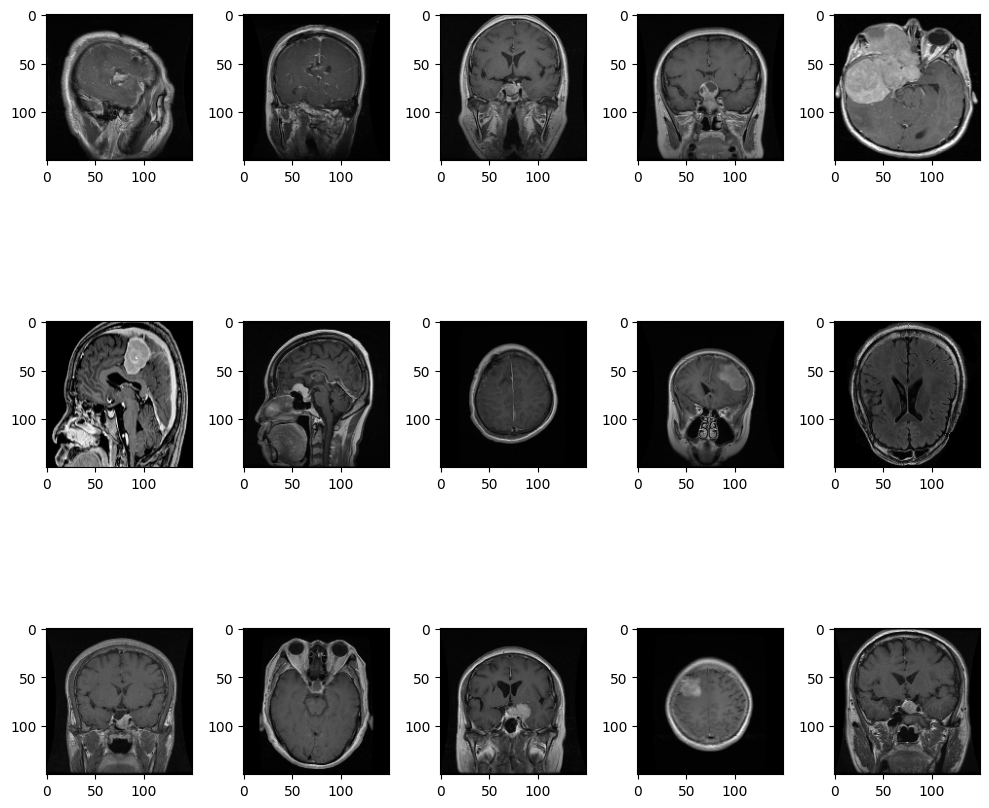

In [ ]:
# Visualize the image
images = [X_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
  ax.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
from tables.array import ImageArray
# ImageDataGenerator transform each image in the batch by a series of random translation, rotations, etc.
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    rotation_range = 10,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator()
# After creating and configuring ImageDataGenerator, we'll fit it into our data
train_datagen.fit(X_train)
test_datagen.fit(X_test)

In [ ]:
model.fit_generator(training_set,
                    steps_per_epoch = len(training_set),
                    epochs = 30,
                    validation_data = testing_set,
                    validation_steps = len(testting_set))

### Playing with different parameters!

In [ ]:
%pip install bayesian-optimization==1.4.1

Reason for being yanked: https://github.com/fmfn/BayesianOptimization/pull/388


In [ ]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
score_acc = make_scorer(accuracy_score)

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'LeakyReLU','relu']

    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)

    def nn_cl_fun():
      opt = Adam(lr = learning_rate)
      nn = Sequential()
      nn.add(Dense(neurons, input_dim=10, activation=activation))
      nn.add(Dense(neurons, activation=activation))
      nn.add(Dense(1, activation='sigmoid'))
      nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
      return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)